In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Parameter input untuk network
input_shape = (150, 150, 3)
# Batch size
batch_size = 16
# Epoch
epoch = 10

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/ 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/ 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/ 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [ ]:
# binary = [1,0] [0,1]
# categorical = 1,2

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/basedata/Train',
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/basedata/Validation',
                                                target_size=input_shape,
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/basedata/Test',
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 12 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
print(labels)

dict_keys(['Asli', 'Palsu'])


In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......OK MANTAP')
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Compiling Model.......OK MANTAP


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 activation_66 (Activation)  (None, 150, 150, 128)     0         
                                                                 
 conv2d_53 (Conv2D)          (None, 148, 148, 32)      36896     
                                                                 
 activation_67 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 74, 74, 32)        0         
                                                     

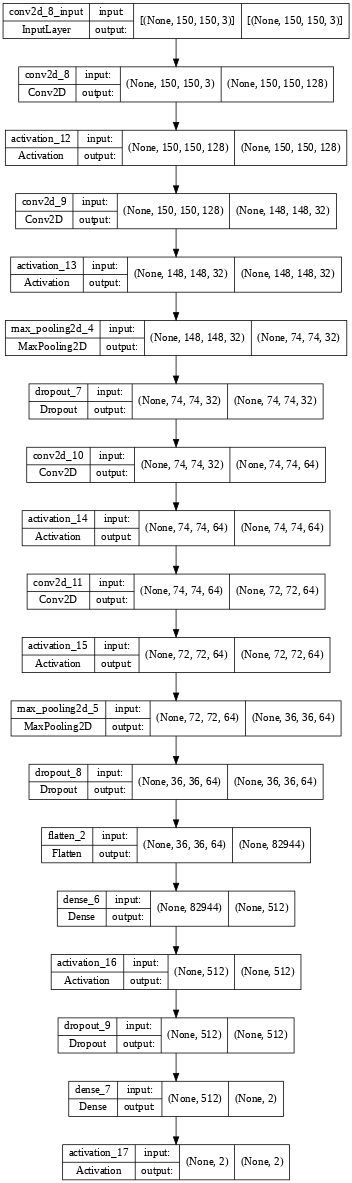

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
EPOCH = 2

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=val_generator)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


ValueError: ignored

In [ ]:
history.history['loss']

NameError: ignored

In [ ]:
history.history['accuracy']

NameError: ignored

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: ignored

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: ignored

In [ ]:
import os

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "BangTanI_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/BangTanI_project/model.h5...


In [ ]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

InvalidArgumentError: ignored

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

SyntaxError: ignored

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")